# Part 3 Codebook

#### Cost Benefit Analysis

In [11]:
import pandas as pd
from pandas import DataFrame as df
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [12]:
test = pd.read_csv('../data/test_final.csv')

In [13]:
pred = pd.read_csv('../kaggle/submission.csv')

In [14]:
test_pred = test.merge(pred, left_on = 'id', right_on = 'Id')

#### Visualize risk locations

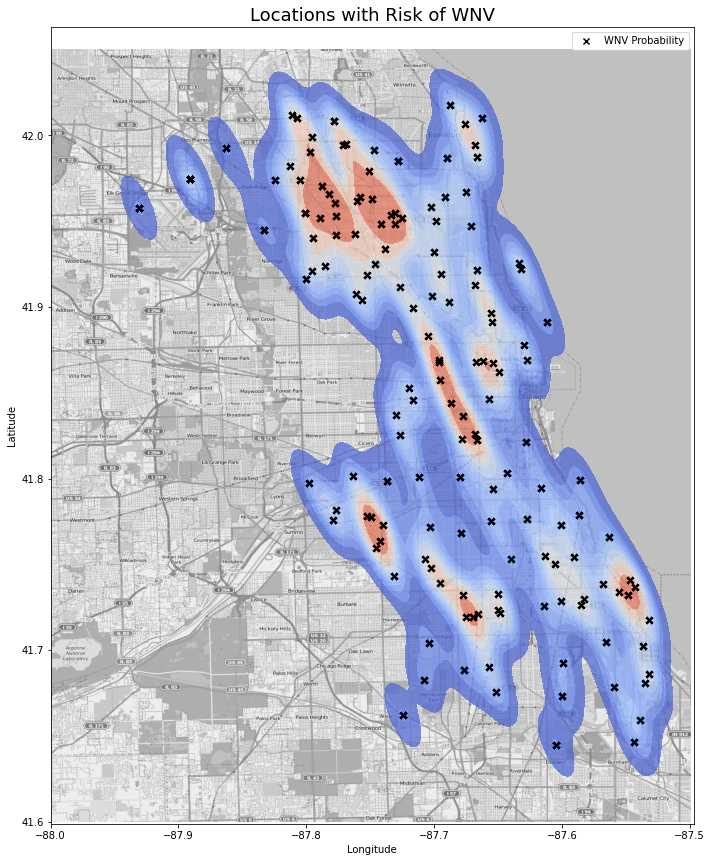

In [15]:
mapdata = np.loadtxt("../data/mapdata_copyright_openstreetmap_contributors.txt")

aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.05)

plt.figure(figsize=(10,16))
plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=lon_lat_box, aspect=aspect)

# KDE plot was used for predicted cases
sns.kdeplot(data=test_pred, x='longitude', y='latitude', fill=True, cmap='coolwarm', alpha = 0.7)

plt.scatter(data=test_pred[test_pred['WnvPresent']!=0], x='longitude', y='latitude', marker='x', 
            color='black', label='WNV Probability')

plt.title('Locations with Risk of WNV', fontsize=18)
plt.legend()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()

# Infer data from map.

1. Coverage of WNV<br>
    a. From the plotted map, it can be seen that the coverage of WNV is spread out along Chicago. <br><br>

2. Worst area<br>
    a. Worst area is on the north and center region. <br><br>

4. Potential WNV area <br>
    a. Potentially, it can be seen that there is potential to spread throughout north and center if it is not controlled. <br>

# Cost

Summary of cost items considering <b> full spraying </b> of Chicago:

A: Area of Chicago: 149,800 acres

source: https://www.chicago.gov/city/en/about/facts.html

B: Spray used by Chicago is Zenivex E4

source: 
a. https://www.fox32chicago.com/news/chicago-to-spray-insecticide-to-protect-against-west-nile-virus
b. https://www.cmmcp.org/pesticide-information/pages/zenivex-e4-etofenprox#:~:text=Zenivex%20is%20an%20insecticide%20that,of%20sunlight%20and%2For%20microorganisms.


C. Cost of Spray
USD 0.67 per acre, before rebates; supplied by Wellmark International

source:
https://www.centralmosquitocontrol.com/-/media/files/centralmosquitocontrol-na/us/resources-lit%20files/zenivex%20cost%20comparison%20fact%20sheet.pdf

Cost of spraying in Chicago:

149,800 acres x USD 0.67 = USD 100,366

##### Medical Costs in Chicago:

In 2014, data was published in 'sciencedaily' for the West Niles Virus:

Acute symptoms:
1. Initial medical cost:
$25,000.

2. Long term medical cost:
$22,000.


Fever related symptoms:
1. Initial medical cost:
$7,500.

Source: https://www.sciencedaily.com/releases/2014/02/140210184713.htm

##### Population Affected by WNV in Chicago, 2014

source: https://www.nbcchicago.com/news/local/illinois-reports-first-west-nile-virus-deaths-of-2014/63948/

According to the source above, there were 15 cases of WNV in Chicago

There were 2 serious cases.

Acute cases: 45,000 x 2 = USD 90,000
Typical cases: 7,500 x 13 = USD 97,500

Total cost of medical care: 90,000 + 97,500 = USD 187,500

##### Productivity Costs in Chicago

source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3322011/ <br>
Table 4

For patients <60 y: USD 191 per day
For 100% of cases, workdays missed = 50.

Total lost productivity cost: 191 * 50 * 15 = USD 143,250

##### Total cost involved if there are 15 cases with 2 acute cases:

USD 187,500 + USD 143,250 = USD 330,750

##### Cost of spraying in Chicago:

149,800 acres x USD 0.67 = USD 100,366

##### Cost Benefit Analysis

From simulation study done in the sources above and cost benefit analysis performed, it can be seen that:



1. Cost of spraying entire city with pesticides to prevent West Nile Virus outbreak is less than 15 person infected with West Niles Virus.

2. Cost of lost productivity for 15 cases is higher than the cost of spraying the entire city with pesticides.

3. Hospital expenses are higher than the cost of spraying the entire city.

Assuming the study performed by pesticide maker for effectiveness above works in controlling the mosquito population as advertised, it can be concluded that spraying the entire city is more cost effective than allowing the population to be infected with WNV virus.

source: https://www.cmmcp.org/pesticide-information/pages/zenivex-e4-etofenprox#:~:text=Zenivex%20is%20an%20insecticide%20that,of%20sunlight%20and%2For%20microorganisms


##### Conclusion

1. The following models were ran to predict mosquitoes infection: <br>
    a. AdaBoost <br>
    b. XGBoost
    
Using ROC AUC score metric for model evaluation, we managed to achieve a score of 0.81.

This score indicates a high level of class separability and shows that the probability of making a correct class prediction is high.

##### Recommendation

1. From the trap data, we can see that there are clusters where WNV are more high occurring. These traps should be targeted before they start to spike in trap detection.

2. It might be efficient to start spraying based on seasonal spikes in July-August before they peak in August and September.

3. Control mosquito breeding grounds through surveillence and education.